In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

#クラスタ数宣言
c = 5
#max繰り返し回数の宣言
max_iter=100
#dfをnumpyで扱えるnp.ndarray変換
df = pd.read_csv("../dataset/input.csv",header=None)
X = df.values
# np.seterr(divide='ignore', invalid='ignore')
#配列の行数、列数の格納
X_size,n_features = X.shape
#epsilonの定義(収束判定)
epsilon=0.000001
#前の中心と比較するために、仮に新しい重心を入れておく配列を用意
new_v = np.zeros((cluster_number, n_features))
#距離の格納 d_ki
d=np.zeros((X_size,cluster_number))

m=3
J=0
best_J = 0
#初期クラスタ中心

In [253]:
#uの最適化部分関数作成
def u_optimize(d):
    u = np.zeros((X_size,cluster_number))
    for k in range(X_size):
        #変数定義
        #x_k != v_iの時
        if 0 not in d[k]:
            for i in range(cluster_number):
                for j in range(cluster_number):
                    u[k][i] = u[k][i] + (d[k][i]/d[k][j])**(1/(m-1))
                u[k][i]=1/u[k][i]
        #x_k=v_iの時
        else:
            for i in range(cluster_number):
                if distances[k][i]==0:
                    u[k][i] = 1
                else:
                    u[k][i]=0
    return u
#クラスタ中心計算部分関数作成
def v_calculation(u_m):
    v = np.zeros((cluster_number,n_features))
    #分母計算
    v_denominator=np.sum(u_m,axis=0)
    #分子計算
    v_numerator = np.zeros((cluster_number,n_features))
    for i in range(cluster_number):
        for k in range(X_size):
            v_numerator[i]=v_numerator[i]+u_m[k][i]*X[k]
    for i in range(cluster_number):
        v[i]= v_numerator[i]/v_denominator[i]
    return v

クラスター中心は
[[0.50474205 0.50645834]
 [0.70629743 0.50596273]
 [0.50002338 0.30542748]
 [0.30756759 0.50063489]
 [0.50517793 0.69697041]]
目的関数は0.018480622047836404
[4 2 1 0 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


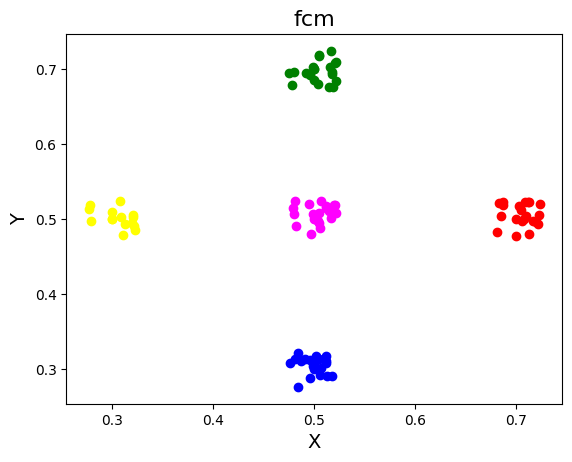

In [255]:
#FCMアルゴリズム
for s in range (10):
    #初期クラスタ中心
    v = X[np.random.choice(X_size,c)]
    for epoch in range(max_iter):
        for k in range(X_size):
            # データから各重心までの距離の二乗を計算
            d[k] = np.sum((v - X[k]) ** 2, axis=1)
        #uの更新
        u = u_optimize(d)
        u_m=np.power(u,m)
        #vの更新
        new_v = v_calculation(u_m)

        #目的関数の計算
        J = np.sum(u_m * d)

        #目的関数の値が良いものに更新していく
        if epoch==0 or J < best_J:
            best_J = J
            best_u = np.copy(u)
            best_v = np.copy(new_v)

        #収束条件
        for i in range(cluster_number):
            v_difference = np.linalg.norm(new_v[i]-v[i], ord=2)
        
        if v_difference.min() < epsilon:
            # print(epoch,"break")
            break
        #値のリセット
        v = np.copy(new_v)
            
    #目的関数の計算
    J = np.sum(u_m * d)
    #目的関数の値が良いものに更新していく
    if s==0 or J < best_J:
        best_J = J
        best_u = np.copy(u)
        best_v = np.copy(new_v)
        #帰属クラスターの決定と格納
        cluster = np.argmax(best_u,axis=1)
        
print("クラスター中心は")
print(best_v)
print("目的関数は"+str(best_J))
print(cluster)
#matplotlibに描写(2次元データ)
if n_features == 2:
    colors = ['red', 'blue', 'green','yellow','fuchsia']

    fig = plt.figure()
    ax = fig.add_subplot(111)

    for i in range(cluster_number):
        ax.scatter(X[:, 0][cluster==i], X[:, 1][cluster==i], color=colors[i])

    ax.set_title('fcm', size=16)
    ax.set_xlabel("X", size=14)
    ax.set_ylabel("Y", size=14)

    plt.show()
    # fig.savefig("fcm2d.pdf")